In [149]:
import pandas as pd
import json

Here we open the json data and normalize the data such that each row corresponds to one ingredient.

The dataset has already been parsed by a CRF model to turn the freeform recipe ingredients into structured data (name, unit, quantity).

In [150]:
with open('enriched_recipes.json') as f:
    data = json.load(f)
    df = pd.json_normalize(
        data, 'parsed_ingredients',
        meta=['author',
              'photo_url',
              'prep_time_minutes',
              'rating_stars',
              'review_count',
              'title',
              'total_time_minutes',
              'url'
             ],
        record_prefix='ingredient_', errors='ignore')

The output data looks like this:

In [151]:
df

,ingredient_comment,ingredient_input,ingredient_name,ingredient_other,ingredient_qty,ingredient_unit,ingredient_range_end,author,photo_url,prep_time_minutes,rating_stars,review_count,title,total_time_minutes,url
0,chilled and cubed,"1/2 cup unsalted butter, chilled and cubed",unsalted butter,",",1/2,cup,NaN,Stephanie,http://images.media-allrecipes.com/userphotos/...,55,4.32,46,"Basil, Roasted Peppers and Monterey Jack Cornb...",100,http://allrecipes.com/Recipe/6664/
1,chopped,1 cup chopped onion,onion,NaN,1,cup,NaN,Stephanie,http://images.media-allrecipes.com/userphotos/...,55,4.32,46,"Basil, Roasted Peppers and Monterey Jack Cornb...",100,http://allrecipes.com/Recipe/6664/
2,NaN,1 3/4 cups cornmeal,cornmeal,NaN,1 3/4,cup,NaN,Stephanie,http://images.media-allrecipes.com/userphotos/...,55,4.32,46,"Basil, Roasted Peppers and Monterey Jack Cornb...",100,http://allrecipes.com/Recipe/6664/
3,NaN,1 1/4 cups all-purpose flour,all-purpose flour,NaN,1 1/4,cup,NaN,Stephanie,http://images.media-allrecipes.com/userphotos/...,55,4.32,46,"Basil, Roasted Peppers and Monterey Jack Cornb...",100,http://allrecipes.com/Recipe/6664/
4,NaN,1/4 cup white sugar,white sugar,NaN,1/4,cup,NaN,Stephanie,http://images.media-allrecipes.com/userphotos/...,55,4.32,46,"Basil, Roasted Peppers and Monterey Jack Cornb...",100,http://allrecipes.com/Recipe/6664/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836531,NaN,2 tablespoons brown sugar,brown sugar,NaN,2,tablespoon,NaN,larkspur,http://images.media-allrecipes.com/global/reci...,32,0.0,0,Blueberry Oatmeal Cream Brulee,44,http://allrecipes.com/Recipe/258791/
836532,NaN,2 tablespoons maple syrup,maple syrup,NaN,2,tablespoon,NaN,larkspur,http://images.media-allrecipes.com/global/reci...,32,0.0,0,Blueberry Oatmeal Cream Brulee,44,http://allrecipes.com/Recipe/258791/
836533,NaN,2 tablespoons butter,butter,NaN,2,tablespoon,NaN,larkspur,http://images.media-allrecipes.com/global/reci...,32,0.0,0,Blueberry Oatmeal Cream Brulee,44,http://allrecipes.com/Recipe/258791/
836534,NaN,1 cup blueberries,blueberries,NaN,1,cup,NaN,larkspur,http://images.media-allrecipes.com/global/reci...,32,0.0,0,Blueberry Oatmeal Cream Brulee,44,http://allrecipes.com/Recipe/258791/


Filter the data where recipe ratings are valid (more than 20 reviews and more than 0 stars).

Then, group the ingredients by ingredient name, and average each ingredient's numerical rating.

In [152]:
grouped = df.where(df['rating_stars'] > 0).where(df['review_count'] > 20).groupby("ingredient_name").agg(avg_rating=("rating_stars", "mean")).reset_index()

In [153]:
grouped

,ingredient_name,avg_rating
0,(.13 ounce) envelope unsweetened grape soft dr...,4.400000
1,(.13 ounce) envelope unsweetened orange soft d...,4.400000
2,(.14 ounce) package sugar free instant lemonad...,4.490000
3,(.18 ounce) packet sazon seasoning,4.520000
4,(.25 ounce) envelope active dry yeast,4.471250
...,...,...
9292,zucchini chunks,4.560000
9293,zucchini matchsticks,4.540000
9294,zucchini squash,4.454000
9295,zucchini squashes,4.260000


In [154]:
spices = [
    'allspice',
    'angelica',
    'anise',
    'asafoetida',
    'bay leaf',
    'basil',
    'bergamot',
    'black cumin',
    'black mustard',
    'black pepper',
    'borage',
    'brown mustard',
    'burnet',
    'caraway',
    'cardamom',
    'cassia',
    'catnip',
    'cayenne pepper',
    'celery seed',
    'chervil',
    'chicory',
    'chili pepper',
    'chives',
    'cicely',
    'cilantro',
    'cinnamon',
    'clove',
    'coriander',
    'costmary',
    'cumin',
    'curry',
    'dill',
    'fennel',
    'fenugreek',
    'filé',
    'ginger',
    'grains of paradise',
    'holy basil',
    'horehound',
    'horseradish',
    'hyssop',
    'lavender',
    'lemon balm',
    'lemon grass',
    'lemon verbena',
    'licorice',
    'lovage',
    'mace',
    'marjoram',
    'nutmeg',
    'oregano',
    'paprika',
    'parsley',
    'peppermint',
    'poppy seed',
    'rosemary',
    'rue',
    'saffron',
    'sage',
    'savory',
    'sesame',
    'sorrel',
    'star anise',
    'spearmint',
    'tarragon',
    'thyme',
    'tumeric',
    'vanilla',
    'wasabi',
    'white mustard'
]

In [155]:
spices_regex = r"|".join(spices)
df['ingredient_name'].value_counts()[:110]

salt                 33137
butter               24385
water                19700
all-purpose flour    18161
garlic               18063
                     ...  
almond extract        1141
green onion           1130
cooking spray         1129
ham                   1127
oil                   1127
Name: ingredient_name, Length: 110, dtype: int64

In [156]:
recipes_with_spices = df.loc[df['ingredient_name'].str.contains(spices_regex).fillna(False)]

replace_dict = {}

for spice in spices:
    replace_dict[f".*{spice}.*"] = spice

recipes_with_spices['spice'] = recipes_with_spices['ingredient_name'].replace(replace_dict, regex=True)

recipes_with_spices['spice'].unique()

/tmp/ipykernel_39172/4080678142.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes_with_spices['spice'] = recipes_with_spices['ingredient_name'].replace(replace_dict, regex=True)


array(['basil', 'black pepper', 'cinnamon', 'nutmeg', 'vanilla', 'dill',
       'poppy seed', 'rosemary', 'parsley', 'cardamom', 'allspice',
       'ginger', 'sesame', 'oregano', 'clove', 'caraway', 'sage',
       'marjoram', 'thyme', 'paprika', 'anise', 'mace', 'cayenne pepper',
       'fennel', 'chives', 'cumin', 'celery seed', 'savory', 'peppermint',
       'angelica', 'licorice', 'spearmint', 'curry', 'bay leaf',
       'saffron', 'cilantro', 'lemon grass', 'horseradish', 'tarragon',
       'coriander', 'lavender', 'sorrel', 'fenugreek', 'chili pepper',
       'asafoetida', 'brown mustard', 'chervil', 'wasabi',
       'black mustard', 'rue', 'chicory', 'lemon balm', 'catnip',
       'lovage', 'lemon verbena', 'tumeric', 'cassia'], dtype=object)

In [192]:
spices_count = recipes_with_spices.groupby("url", as_index=False).agg(spices_count=("spice", "count"), url=("url", "first"))

spices_count
recipes_with_spices
recipes_with_spices_with_count = recipes_with_spices.merge(spices_count, on="url")

multi_spice_recipes = recipes_with_spices_with_count.loc[recipes_with_spices_with_count["spices_count"] > 1]

dummy = pd.get_dummies(multi_spice_recipes, columns=["spice"], prefix='', prefix_sep='').groupby(['url'], as_index=False).max()

/tmp/ipykernel_39172/67376717.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  dummy = pd.get_dummies(multi_spice_recipes, columns=["spice"], prefix='', prefix_sep='').groupby(['url'], as_index=False).max()


In [210]:
spice_corr = dummy.drop(columns=multi_spice_recipes.columns, errors="ignore")
corr = spice_corr.corr()

corr

,allspice,angelica,anise,asafoetida,basil,bay leaf,black mustard,black pepper,brown mustard,caraway,...,sage,savory,sesame,sorrel,spearmint,tarragon,thyme,tumeric,vanilla,wasabi
allspice,1.000000,-0.001236,0.007011,-0.008392,-0.066812,-0.001124,-0.005247,-0.070235,-0.012138,-0.003710,...,-0.035943,0.004774,-0.039231,0.007569,-0.004101,-0.022054,-0.014288,-0.001748,0.007706,-0.010431
angelica,-0.001236,1.000000,-0.000553,-0.000252,-0.002271,-0.001142,-0.000158,-0.004990,-0.000444,-0.000479,...,-0.001815,-0.000353,-0.001436,-0.000105,-0.000123,-0.000797,-0.002092,-0.000053,-0.002822,-0.000314
anise,0.007011,-0.000553,1.000000,-0.003757,-0.012383,0.003500,-0.002349,-0.023792,-0.006613,0.024587,...,-0.020987,0.009036,-0.001051,-0.001566,-0.001836,-0.002233,-0.027124,-0.000783,0.005600,-0.004670
asafoetida,-0.008392,-0.000252,-0.003757,1.000000,-0.015418,-0.007755,0.103311,-0.028364,0.021819,0.008273,...,-0.009027,-0.002397,0.002342,-0.000714,-0.000837,-0.005409,-0.011270,-0.000357,-0.019157,-0.002128
basil,-0.066812,-0.002271,-0.012383,-0.015418,1.000000,-0.005827,-0.009639,0.085789,-0.016162,-0.023444,...,0.029103,0.017765,-0.055714,-0.006425,0.003704,-0.004504,0.044930,0.009964,-0.170689,-0.016949
bay leaf,-0.001124,-0.001142,0.003500,-0.007755,-0.005827,1.000000,-0.004849,0.048050,-0.013650,0.019462,...,0.024545,0.017585,-0.037714,-0.003232,-0.003790,0.002658,0.153649,-0.001616,-0.085679,-0.009639
black mustard,-0.005247,-0.000158,-0.002349,0.103311,-0.009639,-0.004849,1.000000,-0.006513,-0.001884,0.034792,...,-0.007701,-0.001499,-0.006095,-0.000446,-0.000523,-0.003382,-0.008878,-0.000223,-0.011977,-0.001331
black pepper,-0.070235,-0.004990,-0.023792,-0.028364,0.085789,0.048050,-0.006513,1.000000,0.005268,-0.006986,...,0.046709,0.015621,-0.069179,0.003477,-0.009050,0.020456,0.093523,-0.007057,-0.371741,-0.011060
brown mustard,-0.012138,-0.000444,-0.006613,0.021819,-0.016162,-0.013650,-0.001884,0.005268,1.000000,0.040272,...,-0.004796,-0.004219,-0.007967,-0.001256,-0.001473,-0.005529,-0.003275,-0.000628,-0.033718,-0.003746
caraway,-0.003710,-0.000479,0.024587,0.008273,-0.023444,0.019462,0.034792,-0.006986,0.040272,1.000000,...,0.016664,-0.004550,-0.018505,-0.001355,-0.001588,-0.002858,-0.012999,-0.000677,-0.030118,-0.004040


/tmp/ipykernel_39172/999074949.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=90, fontsize=10)
/tmp/ipykernel_39172/999074949.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=10)


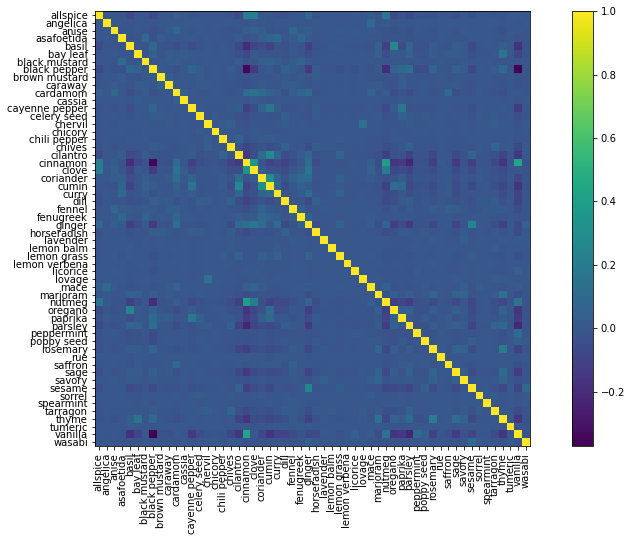

In [206]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
plt.imshow(corr, interpolation='nearest')
plt.colorbar()
labels = spice_corr.columns.tolist()
ax1.set_xticklabels(labels,rotation=90, fontsize=10)
ax1.set_yticklabels(labels,fontsize=10)

ax1.set_xticks(np.arange(len(labels)))
ax1.set_yticks(np.arange(len(labels)))

plt.show()